# Threshold detector
閾値で異常検知

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Data:
    def __init__(self, name):
        # 加速度、角速度データの読み込み
        data = np.loadtxt("data1/" + name + ".txt")
        self.accel_x = data[0:,0:1]
        self.accel_y = data[0:,1:2]
        self.accel_z = data[0:,2:3]
        
        self.omega_x = data[0:,3:4]
        self.omega_y = data[0:,4:5]
        self.omega_z = data[0:,5:6]
        
        self.t = np.arange(0, len(self.accel_x), 1)
        
# 加速度描画関数

def plot_accel(data, x_min, x_max):
    fig = plt.figure(figsize=(20,3))
    sp = fig.add_subplot(111)
    sp.set_xlim(x_min, x_max)
    sp.set_ylim(-45, 25)
    plt.title("acceleration")
    plt.plot(data.t, data.accel_x, color = "orange",label="x")
    plt.plot(data.t, data.accel_y, color = "skyblue",label="y")
    plt.plot(data.t, data.accel_z, color = "pink",label="z")
    plt.legend()
    plt.show()
    
def plot_other(data, x_min, x_max, y_min, y_max, labels):
    fig = plt.figure(figsize=(20,3))
    sp = fig.add_subplot(111)
    sp.set_xlim(x_min, x_max)
    sp.set_ylim(y_min, y_max)
    for i in range(len(data)):
        plt.plot(np.arange(0, len(data[i]), 1), data[i], label=labels[i])
    plt.legend()
    plt.show()

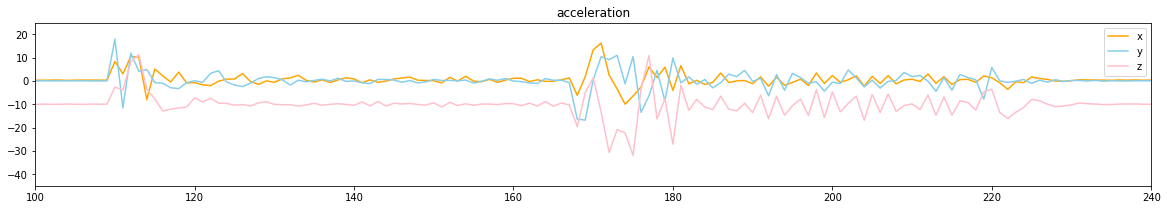

In [3]:
# データの読み込み
crash = Data("crash")

# 描画
plot_accel(crash, 100, 240)

In [4]:
# 閾値内に値があれば0、外だと1を配列に保存
# 閾値は適当に決めた
ano_th = []

th_x_max = 2.5
th_x_min = -2.5
ano_th.append(np.empty((0,1), int))
for i in crash.accel_x:
    if i > th_x_max:
        ano_th[0] = np.append(ano_th[0], np.array([[1]]), axis=0)
    elif i < th_x_min:
        ano_th[0] = np.append(ano_th[0], np.array([[1]]), axis=0)
    else :
        ano_th[0] = np.append(ano_th[0], np.array([[0]]), axis=0)

th_y_max = 2.5
th_y_min = -2.5
ano_th.append(np.empty((0,1), int))
for i in crash.accel_y:
    if i > th_y_max:
        ano_th[1] = np.append(ano_th[1], np.array([[1]]), axis=0)
    elif i < th_y_min:
        ano_th[1] = np.append(ano_th[1], np.array([[1]]), axis=0)
    else :
        ano_th[1] = np.append(ano_th[1], np.array([[0]]), axis=0)

th_z_max = -7.3
th_z_min = -12.2
ano_th.append(np.empty((0,1), int))
for i in crash.accel_z:
    if i > th_z_max:
        ano_th[2] = np.append(ano_th[2], np.array([[1]]), axis=0)
    elif i < th_z_min:
        ano_th[2] = np.append(ano_th[2], np.array([[1]]), axis=0)
    else :
        ano_th[2] = np.append(ano_th[2], np.array([[0]]), axis=0)

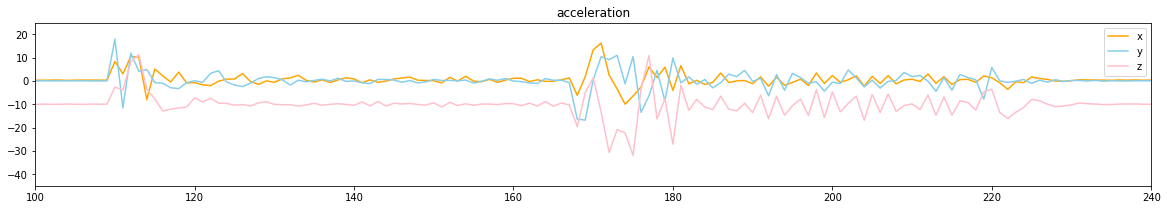

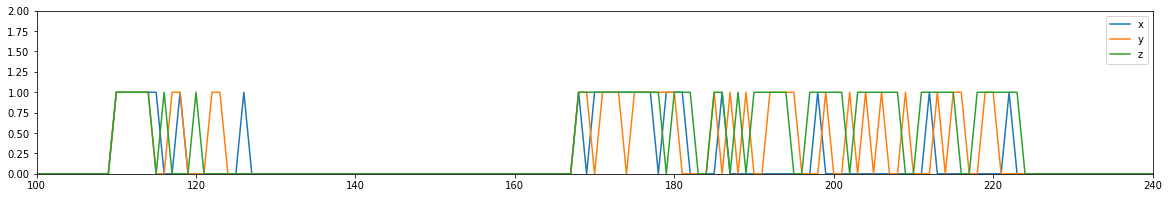

In [5]:
# 描画
plot_accel(crash, 100, 240)
plot_other(ano_th, 100, 240, 0, 2, ["x", "y", "z"])